1/1 [==============================] - 0s 158ms/step
Recognized Digits: ['', '0']


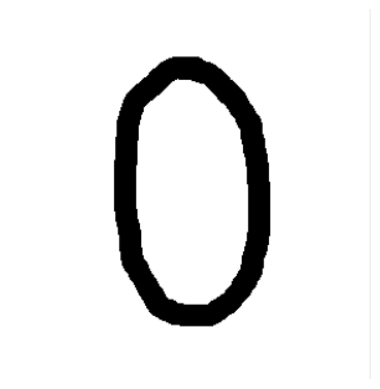

In [213]:
import cv2
import pytesseract
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the pre-trained MNIST model
model = tf.keras.models.load_model('mnist.h5')

# Load the image using OpenCV
image = cv2.imread('dataset/zero.png')

# Preprocess the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize an empty list to store recognized digits
recognized_digits = []

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates
    (x, y, w, h) = cv2.boundingRect(contour)

    # Use the entire image as the digit ROI
    roi = thresh

    # Use Tesseract OCR to recognize the digit
    pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'
    digit = pytesseract.image_to_string(roi, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')

    # Append the recognized digit to the list
    recognized_digits.append(digit)

# If no digit is recognized with Tesseract, use the MNIST model
if not any(recognized_digits):
    # Preprocess the image for the MNIST model
    resized_image = cv2.resize(gray, (28, 28))
    normalized_image = resized_image.reshape(1, 28, 28, 1).astype('float32') / 255.0

    # Perform digit recognition with the MNIST model
    prediction = model.predict(normalized_image)
    digit = np.argmax(prediction)

    # Append the recognized digit to the list
    recognized_digits.append(str(digit))

# Print the recognized digits
print('Recognized Digits:', recognized_digits)

# Display the entire image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
